LSTM makes use of two transfer functions internally,those are:
1.Sigmoid Function:Used to form gates inside the LSTM Block
2.Hyperbolic Function:Used to extract the Scaled Output from the gates

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd

In [2]:
def sigmoid(x):
    y = []
    for i in x:
        y.append(1/(1+math.exp(-i)))
    return y
def hyperbolic_tan(x):
    y = []
    for i in x:
        y.append(math.tanh(i))
    return y

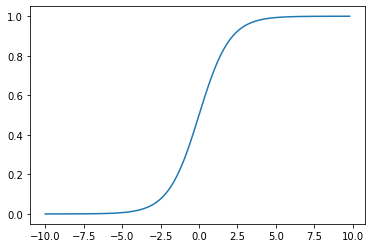

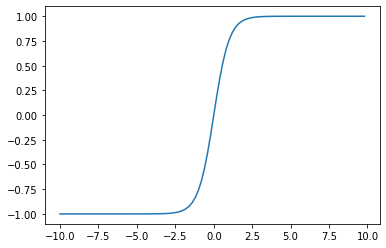

In [3]:
x = np.arange(-10,10,0.2)
y1 = sigmoid(x)
y2 = hyperbolic_tan(x)

plt.plot(x,y1)
plt.show()

plt.plot(x,y2)
plt.show()

Both these functions compresses output from (0 to 1) for sigmooid and (-1 to 1) for hyperbolic_tan

LSTM made of 3 gates:
forgot gate:controls when to make context forget
input gate
output gate

# EXAMPLE 1

# Building a Simple LSTM

In [4]:
data = [[[(i+j)/100] for i in range(5)] for j in range(100)]

In [5]:
target = [(i+5)/100 for i in range(100)]

In [6]:
data = np.array(data,dtype = float)

In [7]:
data

array([[[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]],

       [[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]],

       [[0.02],
        [0.03],
        [0.04],
        [0.05],
        [0.06]],

       [[0.03],
        [0.04],
        [0.05],
        [0.06],
        [0.07]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.05],
        [0.06],
        [0.07],
        [0.08],
        [0.09]],

       [[0.06],
        [0.07],
        [0.08],
        [0.09],
        [0.1 ]],

       [[0.07],
        [0.08],
        [0.09],
        [0.1 ],
        [0.11]],

       [[0.08],
        [0.09],
        [0.1 ],
        [0.11],
        [0.12]],

       [[0.09],
        [0.1 ],
        [0.11],
        [0.12],
        [0.13]],

       [[0.1 ],
        [0.11],
        [0.12],
        [0.13],
        [0.14]],

       [[0.11],
        [0.12],
        [0.13],
        [0.14],
        [0.15]],

       [[0.12],


In [8]:
data.shape

(100, 5, 1)

In [9]:
data.reshape(100,5,1)

array([[[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]],

       [[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]],

       [[0.02],
        [0.03],
        [0.04],
        [0.05],
        [0.06]],

       [[0.03],
        [0.04],
        [0.05],
        [0.06],
        [0.07]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.05],
        [0.06],
        [0.07],
        [0.08],
        [0.09]],

       [[0.06],
        [0.07],
        [0.08],
        [0.09],
        [0.1 ]],

       [[0.07],
        [0.08],
        [0.09],
        [0.1 ],
        [0.11]],

       [[0.08],
        [0.09],
        [0.1 ],
        [0.11],
        [0.12]],

       [[0.09],
        [0.1 ],
        [0.11],
        [0.12],
        [0.13]],

       [[0.1 ],
        [0.11],
        [0.12],
        [0.13],
        [0.14]],

       [[0.11],
        [0.12],
        [0.13],
        [0.14],
        [0.15]],

       [[0.12],


In [10]:
target = np.array(target,dtype = float)

In [11]:
from sklearn.model_selection import train_test_split
X_tr,X_tst,y_tr,y_tst = train_test_split(data,target,test_size= 0.2,random_state = 2)


In [12]:
from keras.models import Sequential
from keras import layers as L
model= Sequential()


Using TensorFlow backend.


In [13]:
model = Sequential(
    [
        L.LSTM((1),batch_input_shape=(None,None,1),return_sequences= False)
    ]
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.compile(optimizer = 'adam',loss = 'mean_absolute_error',metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_tr,y_tr,epochs = 500,validation_data = (X_tst,y_tst))


Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.0000e+00 - val_loss: 0.5424 - val_accuracy: 0.0000e+00
Epoch 2/500
80/80 [==============================] - 0s 137us/step - loss: 0.7028 - accuracy: 0.0000e+00 - val_loss: 0.5387 - val_accuracy: 0.0000e+00
Epoch 3/500
80/80 [==============================] - 0s 137us/step - loss: 0.6990 - accuracy: 0.0000e+00 - val_loss: 0.5351 - val_accuracy: 0.0000e+00
Epoch 4/500
80/80 [==============================] - 0s 125us/step - loss: 0.6953 - accuracy: 0.0000e+00 - val_loss: 0.5316 - val_accuracy: 0.0000e+00
Epoch 5/500
80/80 [==============================] - 0s 137us/step - loss: 0.6916 - accuracy: 0.0000e+00 - val_loss: 0.5281 - val_accuracy: 0.0000e+00
Epoch 6/500
80/80 [==============================] - 0s 150us/step - loss: 0.6880 - accuracy: 0.0000e+00 - val_loss: 0.5246 - val_accuracy: 0.0000e+00
Epoch 7/500
80/80 [==============================] 

80/80 [==============================] - 0s 112us/step - loss: 0.5695 - accuracy: 0.0000e+00 - val_loss: 0.4199 - val_accuracy: 0.0000e+00
Epoch 54/500
80/80 [==============================] - 0s 125us/step - loss: 0.5677 - accuracy: 0.0000e+00 - val_loss: 0.4185 - val_accuracy: 0.0000e+00
Epoch 55/500
80/80 [==============================] - 0s 137us/step - loss: 0.5659 - accuracy: 0.0000e+00 - val_loss: 0.4172 - val_accuracy: 0.0000e+00
Epoch 56/500
80/80 [==============================] - 0s 150us/step - loss: 0.5641 - accuracy: 0.0000e+00 - val_loss: 0.4159 - val_accuracy: 0.0000e+00
Epoch 57/500
80/80 [==============================] - 0s 112us/step - loss: 0.5624 - accuracy: 0.0000e+00 - val_loss: 0.4145 - val_accuracy: 0.0000e+00
Epoch 58/500
80/80 [==============================] - 0s 137us/step - loss: 0.5607 - accuracy: 0.0000e+00 - val_loss: 0.4132 - val_accuracy: 0.0000e+00
Epoch 59/500
80/80 [==============================] - 0s 137us/step - loss: 0.5590 - accuracy: 0.0000

Epoch 107/500
80/80 [==============================] - 0s 125us/step - loss: 0.4718 - accuracy: 0.0000e+00 - val_loss: 0.3375 - val_accuracy: 0.0000e+00
Epoch 108/500
80/80 [==============================] - 0s 112us/step - loss: 0.4692 - accuracy: 0.0000e+00 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 109/500
80/80 [==============================] - 0s 112us/step - loss: 0.4665 - accuracy: 0.0000e+00 - val_loss: 0.3340 - val_accuracy: 0.0000e+00
Epoch 110/500
80/80 [==============================] - 0s 125us/step - loss: 0.4641 - accuracy: 0.0000e+00 - val_loss: 0.3322 - val_accuracy: 0.0000e+00
Epoch 111/500
80/80 [==============================] - 0s 112us/step - loss: 0.4614 - accuracy: 0.0000e+00 - val_loss: 0.3303 - val_accuracy: 0.0000e+00
Epoch 112/500
80/80 [==============================] - 0s 112us/step - loss: 0.4587 - accuracy: 0.0000e+00 - val_loss: 0.3285 - val_accuracy: 0.0000e+00
Epoch 113/500
80/80 [==============================] - 0s 125us/step - loss: 0.456

80/80 [==============================] - 0s 125us/step - loss: 0.2705 - accuracy: 0.0000e+00 - val_loss: 0.2861 - val_accuracy: 0.0000e+00
Epoch 161/500
80/80 [==============================] - 0s 112us/step - loss: 0.2676 - accuracy: 0.0000e+00 - val_loss: 0.2864 - val_accuracy: 0.0000e+00
Epoch 162/500
80/80 [==============================] - 0s 112us/step - loss: 0.2645 - accuracy: 0.0000e+00 - val_loss: 0.2866 - val_accuracy: 0.0000e+00
Epoch 163/500
80/80 [==============================] - 0s 112us/step - loss: 0.2616 - accuracy: 0.0000e+00 - val_loss: 0.2868 - val_accuracy: 0.0000e+00
Epoch 164/500
80/80 [==============================] - 0s 125us/step - loss: 0.2591 - accuracy: 0.0000e+00 - val_loss: 0.2869 - val_accuracy: 0.0000e+00
Epoch 165/500
80/80 [==============================] - 0s 125us/step - loss: 0.2566 - accuracy: 0.0000e+00 - val_loss: 0.2871 - val_accuracy: 0.0000e+00
Epoch 166/500
80/80 [==============================] - 0s 112us/step - loss: 0.2542 - accuracy: 

Epoch 215/500
80/80 [==============================] - 0s 137us/step - loss: 0.2100 - accuracy: 0.0125 - val_loss: 0.2829 - val_accuracy: 0.0000e+00
Epoch 216/500
80/80 [==============================] - 0s 125us/step - loss: 0.2098 - accuracy: 0.0125 - val_loss: 0.2827 - val_accuracy: 0.0000e+00
Epoch 217/500
80/80 [==============================] - 0s 137us/step - loss: 0.2095 - accuracy: 0.0125 - val_loss: 0.2825 - val_accuracy: 0.0000e+00
Epoch 218/500
80/80 [==============================] - 0s 125us/step - loss: 0.2092 - accuracy: 0.0125 - val_loss: 0.2823 - val_accuracy: 0.0000e+00
Epoch 219/500
80/80 [==============================] - 0s 125us/step - loss: 0.2089 - accuracy: 0.0125 - val_loss: 0.2821 - val_accuracy: 0.0000e+00
Epoch 220/500
80/80 [==============================] - 0s 125us/step - loss: 0.2086 - accuracy: 0.0125 - val_loss: 0.2818 - val_accuracy: 0.0000e+00
Epoch 221/500
80/80 [==============================] - 0s 112us/step - loss: 0.2083 - accuracy: 0.0125 - v

Epoch 270/500
80/80 [==============================] - 0s 112us/step - loss: 0.1965 - accuracy: 0.0125 - val_loss: 0.2672 - val_accuracy: 0.0000e+00
Epoch 271/500
80/80 [==============================] - 0s 125us/step - loss: 0.1963 - accuracy: 0.0125 - val_loss: 0.2669 - val_accuracy: 0.0000e+00
Epoch 272/500
80/80 [==============================] - 0s 112us/step - loss: 0.1961 - accuracy: 0.0125 - val_loss: 0.2667 - val_accuracy: 0.0000e+00
Epoch 273/500
80/80 [==============================] - 0s 112us/step - loss: 0.1959 - accuracy: 0.0125 - val_loss: 0.2664 - val_accuracy: 0.0000e+00
Epoch 274/500
80/80 [==============================] - 0s 112us/step - loss: 0.1957 - accuracy: 0.0125 - val_loss: 0.2660 - val_accuracy: 0.0000e+00
Epoch 275/500
80/80 [==============================] - 0s 112us/step - loss: 0.1955 - accuracy: 0.0125 - val_loss: 0.2658 - val_accuracy: 0.0000e+00
Epoch 276/500
80/80 [==============================] - 0s 112us/step - loss: 0.1952 - accuracy: 0.0125 - v

Epoch 325/500
80/80 [==============================] - 0s 112us/step - loss: 0.1844 - accuracy: 0.0125 - val_loss: 0.2492 - val_accuracy: 0.0000e+00
Epoch 326/500
80/80 [==============================] - 0s 125us/step - loss: 0.1842 - accuracy: 0.0125 - val_loss: 0.2489 - val_accuracy: 0.0000e+00
Epoch 327/500
80/80 [==============================] - 0s 125us/step - loss: 0.1839 - accuracy: 0.0125 - val_loss: 0.2485 - val_accuracy: 0.0000e+00
Epoch 328/500
80/80 [==============================] - 0s 112us/step - loss: 0.1837 - accuracy: 0.0125 - val_loss: 0.2482 - val_accuracy: 0.0000e+00
Epoch 329/500
80/80 [==============================] - 0s 125us/step - loss: 0.1835 - accuracy: 0.0125 - val_loss: 0.2478 - val_accuracy: 0.0000e+00
Epoch 330/500
80/80 [==============================] - 0s 125us/step - loss: 0.1832 - accuracy: 0.0125 - val_loss: 0.2475 - val_accuracy: 0.0000e+00
Epoch 331/500
80/80 [==============================] - 0s 112us/step - loss: 0.1830 - accuracy: 0.0125 - v

Epoch 380/500
80/80 [==============================] - 0s 112us/step - loss: 0.1704 - accuracy: 0.0125 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 381/500
80/80 [==============================] - 0s 125us/step - loss: 0.1701 - accuracy: 0.0125 - val_loss: 0.2282 - val_accuracy: 0.0000e+00
Epoch 382/500
80/80 [==============================] - 0s 112us/step - loss: 0.1698 - accuracy: 0.0125 - val_loss: 0.2277 - val_accuracy: 0.0000e+00
Epoch 383/500
80/80 [==============================] - 0s 112us/step - loss: 0.1695 - accuracy: 0.0125 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 384/500
80/80 [==============================] - 0s 125us/step - loss: 0.1692 - accuracy: 0.0125 - val_loss: 0.2267 - val_accuracy: 0.0000e+00
Epoch 385/500
80/80 [==============================] - 0s 100us/step - loss: 0.1689 - accuracy: 0.0125 - val_loss: 0.2262 - val_accuracy: 0.0000e+00
Epoch 386/500
80/80 [==============================] - 0s 125us/step - loss: 0.1686 - accuracy: 0.0125 - v

Epoch 435/500
80/80 [==============================] - 0s 112us/step - loss: 0.1488 - accuracy: 0.0125 - val_loss: 0.1936 - val_accuracy: 0.0000e+00
Epoch 436/500
80/80 [==============================] - 0s 125us/step - loss: 0.1483 - accuracy: 0.0125 - val_loss: 0.1927 - val_accuracy: 0.0000e+00
Epoch 437/500
80/80 [==============================] - 0s 112us/step - loss: 0.1477 - accuracy: 0.0125 - val_loss: 0.1918 - val_accuracy: 0.0000e+00
Epoch 438/500
80/80 [==============================] - 0s 112us/step - loss: 0.1472 - accuracy: 0.0125 - val_loss: 0.1908 - val_accuracy: 0.0000e+00
Epoch 439/500
80/80 [==============================] - 0s 112us/step - loss: 0.1466 - accuracy: 0.0125 - val_loss: 0.1898 - val_accuracy: 0.0000e+00
Epoch 440/500
80/80 [==============================] - 0s 125us/step - loss: 0.1461 - accuracy: 0.0125 - val_loss: 0.1888 - val_accuracy: 0.0000e+00
Epoch 441/500
80/80 [==============================] - 0s 125us/step - loss: 0.1455 - accuracy: 0.0125 - v

Epoch 490/500
80/80 [==============================] - 0s 125us/step - loss: 0.1012 - accuracy: 0.0125 - val_loss: 0.1165 - val_accuracy: 0.0000e+00
Epoch 491/500
80/80 [==============================] - 0s 125us/step - loss: 0.0999 - accuracy: 0.0125 - val_loss: 0.1148 - val_accuracy: 0.0000e+00
Epoch 492/500
80/80 [==============================] - 0s 125us/step - loss: 0.0986 - accuracy: 0.0125 - val_loss: 0.1128 - val_accuracy: 0.0000e+00
Epoch 493/500
80/80 [==============================] - 0s 125us/step - loss: 0.0972 - accuracy: 0.0125 - val_loss: 0.1109 - val_accuracy: 0.0000e+00
Epoch 494/500
80/80 [==============================] - 0s 112us/step - loss: 0.0958 - accuracy: 0.0125 - val_loss: 0.1089 - val_accuracy: 0.0000e+00
Epoch 495/500
80/80 [==============================] - 0s 112us/step - loss: 0.0943 - accuracy: 0.0125 - val_loss: 0.1066 - val_accuracy: 0.0000e+00
Epoch 496/500
80/80 [==============================] - 0s 112us/step - loss: 0.0928 - accuracy: 0.0125 - v

In [17]:
results = model.predict(X_tst)

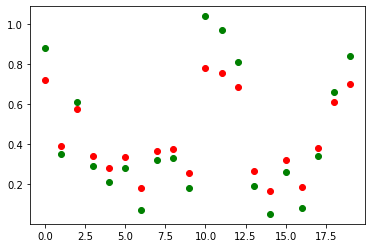

In [18]:
plt.scatter(range(20),results,c = 'r')
plt.scatter(range(20),y_tst,c='g')

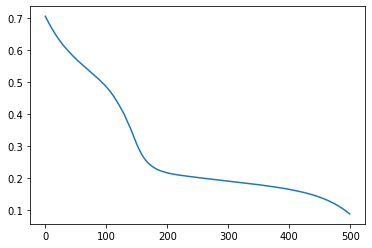

In [19]:
plt.plot(history.history['loss'])
plt.show()

#  EXAMPLE 2

In [20]:
names = ['year', 'month', 'day', 'dec_year', 'sn_value' , 
         'sn_error', 'obs_num']
sunspt = pd.read_csv('S:\datasets\Sunspot\SN_d_tot_V2.0.csv',sep=';',header=None,names=names,
                 na_values=['-1'], index_col=False)


In [21]:
sunspt

,year,month,day,dec_year,sn_value,sn_error,obs_num
0,1818,1,1,1818.001,-1,NaN,0
1,1818,1,2,1818.004,-1,NaN,0
2,1818,1,3,1818.007,-1,NaN,0
3,1818,1,4,1818.010,-1,NaN,0
4,1818,1,5,1818.012,-1,NaN,0
...,...,...,...,...,...,...,...
73956,2020,6,26,2020.485,6,0.3,22
73957,2020,6,27,2020.488,4,0.9,12
73958,2020,6,28,2020.490,0,0.0,27
73959,2020,6,29,2020.493,0,0.0,37


In [22]:
index = pd.to_datetime((sunspt.year*10000+sunspt.month*100+sunspt.day).apply(str),format='%Y%m%d')
sunspt.index = index

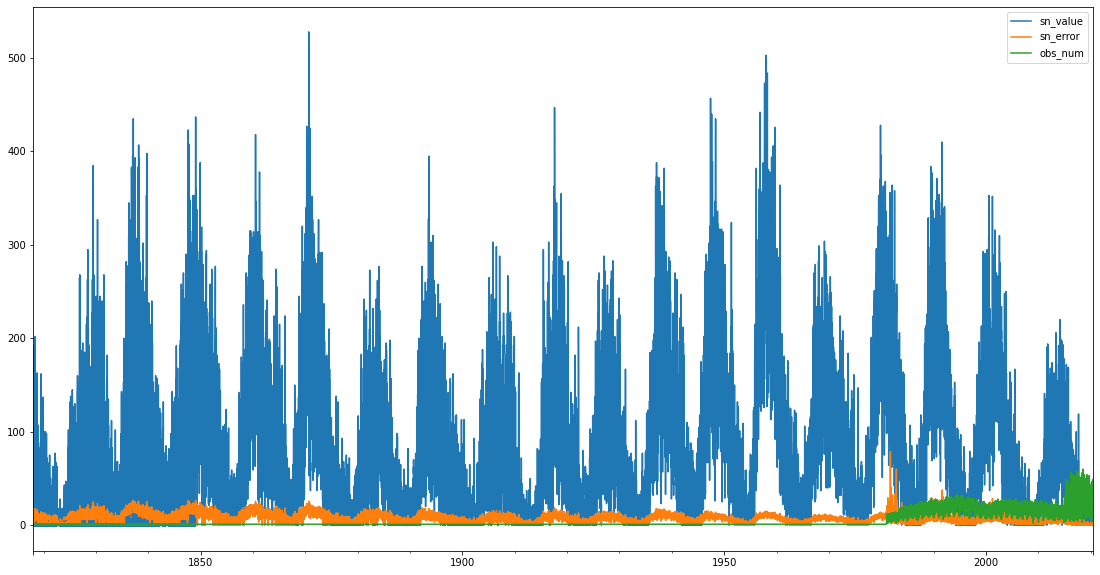

In [23]:
sunspt.drop(columns = ['year', 'month', 'day', 'dec_year']).plot(figsize = (19,10))

In [24]:
test = sunspt[sunspt['year']>2000]
train = sunspt[sunspt['year']<=2000]

spot_train= train['sn_value'].to_list()
spot_test= test['sn_value'].to_list()

In [25]:
test.isnull().sum()

year        0
month       0
day         0
dec_year    0
sn_value    0
sn_error    0
obs_num     0
dtype: int64

In [26]:
def to_sup_sequence(sequence_size,col):
    X = []
    y = []
    
    for i in range(len(col)-sequence_size):
        window = col[i:(i+sequence_size)]
        after_window = col[sequence_size+i]
        window = [[x] for x in window]
        X.append(window)
        y.append(after_window)
    
    return np.array(X),np.array(y)

In [27]:
a,b = to_sup_sequence(100,spot_train)
c,d = to_sup_sequence(100,spot_test)

In [28]:
print('a:',a.shape,' ','b:',b.shape,'c:',c.shape,' ','d:',d.shape)

a: (66740, 100, 1)   b: (66740,) c: (7021, 100, 1)   d: (7021,)


In [29]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model2 = Sequential(
    [
       L.LSTM((64),recurrent_dropout=0.0,input_shape = (None,1)),
       L.Dense(32),
       L.Dense(1)
    ]
)

In [32]:
model2.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [33]:
from keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor = 'val_loss',min_delta = 1e-3,patience = 5,verbose = 1,mode = 'auto',restore_best_weights=True)

history1 = model2.fit(a,b,validation_data = (c,d),callbacks = [monitor],verbose = 2,epochs = 1000)

Train on 66740 samples, validate on 7021 samples
Epoch 1/1000
 - 74s - loss: 1613.6969 - val_loss: 171.6548
Epoch 2/1000
 - 76s - loss: 984.9287 - val_loss: 192.9697
Epoch 3/1000
 - 75s - loss: 962.6092 - val_loss: 222.1688
Epoch 4/1000
 - 79s - loss: 961.3910 - val_loss: 159.4226
Epoch 5/1000
 - 79s - loss: 949.6033 - val_loss: 164.1905
Epoch 6/1000
 - 79s - loss: 950.7256 - val_loss: 210.8079
Epoch 7/1000
 - 81s - loss: 950.7727 - val_loss: 170.3200
Epoch 8/1000
 - 83s - loss: 946.6828 - val_loss: 171.5472
Epoch 9/1000
 - 80s - loss: 943.2056 - val_loss: 158.9016
Epoch 10/1000
 - 81s - loss: 944.9530 - val_loss: 160.8714
Epoch 11/1000
 - 86s - loss: 944.4565 - val_loss: 161.9514
Epoch 12/1000
 - 81s - loss: 938.5389 - val_loss: 161.4408
Epoch 13/1000
 - 81s - loss: 940.3098 - val_loss: 166.3603
Epoch 14/1000
 - 80s - loss: 936.8899 - val_loss: 168.5188
Restoring model weights from the end of the best epoch
Epoch 00014: early stopping


In [34]:
history1.history

{'val_loss': [171.65483475247606,
  192.96965299143682,
  222.16879056624379,
  159.42256537727982,
  164.19046000628845,
  210.8079229408376,
  170.31995520994477,
  171.54718199565428,
  158.90163651498833,
  160.87135807032465,
  161.95140030899884,
  161.44075795833652,
  166.36030470253547,
  168.51878175272287],
 'loss': [1613.6968906383154,
  984.9286852723723,
  962.6092135686878,
  961.3910298256878,
  949.6032874263116,
  950.7256458825468,
  950.7726961121575,
  946.6828081432202,
  943.2055595509978,
  944.9530114091297,
  944.4564740303001,
  938.5388613748022,
  940.3098446835434,
  936.8899414720955]}

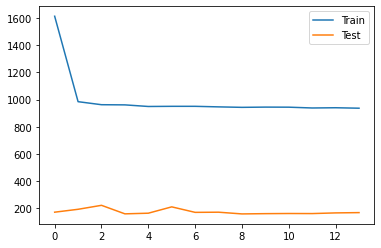

In [35]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['Train','Test'])

In [36]:
pred = model2.predict(c)

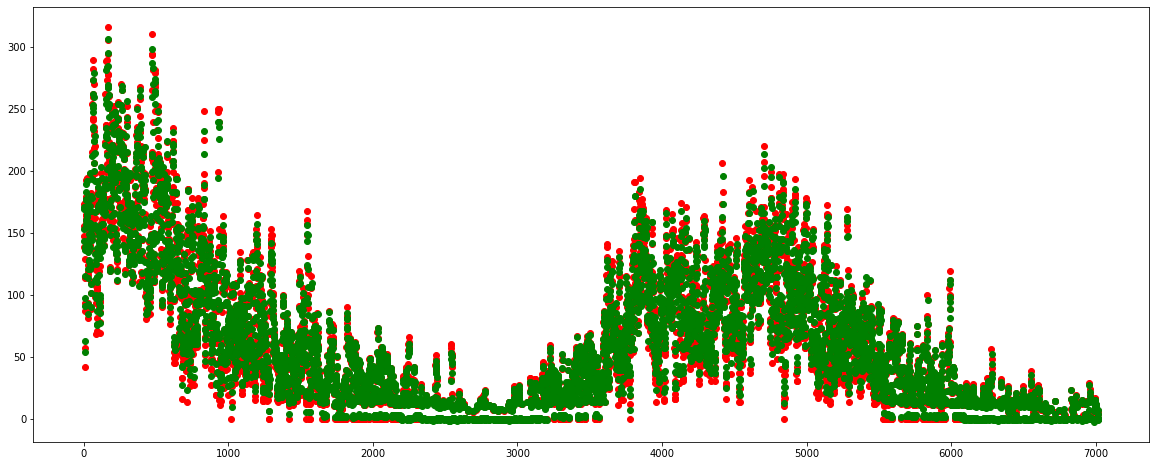

In [37]:
fig= plt.figure(figsize=(20,8))
plt.scatter(np.array(range(c.shape[0])),d,c = 'r')
plt.scatter(np.array(range(c.shape[0])),pred,c = 'g')